In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp
from detection import eddyDetection
import ast
from tqdm import tqdm
from detection import newEddyMethod
from IPython.display import Video, display
from animation import animation_local_gif
from PIL import Image
import IPython.display as ipy_display
import ipywidgets as widgets

In [2]:
df_OW = xr.open_dataset('D:/MScData/Horizontal_Okubo_weiss.nc')['Okubo_Weiss']
df_OW = df_OW*(1/(10**(-9)))
df_eta = xr.open_dataset('D:/MScData/Horizontal_Eta.nc')['Eta']
df_hor_vel = xr.open_dataset('D:/MScData/Horizontal_hor_vel.nc')['hor_vel']

In [3]:
# Inner domain
domain_center = [[-20,0],[71,74]]
OW_center = df_OW.sel(X=slice(domain_center[0][0],domain_center[0][1])).sel(Y=slice(domain_center[1][0],domain_center[1][1])).sel(Z=-1)
eta_center = df_eta.sel(X=slice(domain_center[0][0],domain_center[0][1])).sel(Y=slice(domain_center[1][0],domain_center[1][1]))

# Outer domain
eta = df_eta.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-1,domain_center[1][1]+1))
OW = df_OW.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-1,domain_center[1][1]+1)).sel(Z=-1)

# Resample data
eta = eta.resample(time='D').mean(dim='time')
eta_center = eta_center.resample(time='D').mean(dim='time')
OW = OW.resample(time='D').mean(dim='time')
OW_center = OW_center.resample(time='D').mean(dim='time')
hor_vel = df_hor_vel.resample(time='D').mean(dim='time')

# Define time extent
time = ['2018-01-01T00:00:00.000000000','2018-01-31T00:00:00.000000000']
eta = eta.sel(time=slice(time[0],time[1]))
eta_center = eta_center.sel(time=slice(time[0],time[1]))
OW = OW.sel(time=slice(time[0],time[1]))
OW_center = OW_center.sel(time=slice(time[0],time[1]))
hor_vel = hor_vel.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))

<xarray.DataArray 'Okubo_Weiss' ()>
array(-55.20224329)
Coordinates:
    Z        float64 -1.0


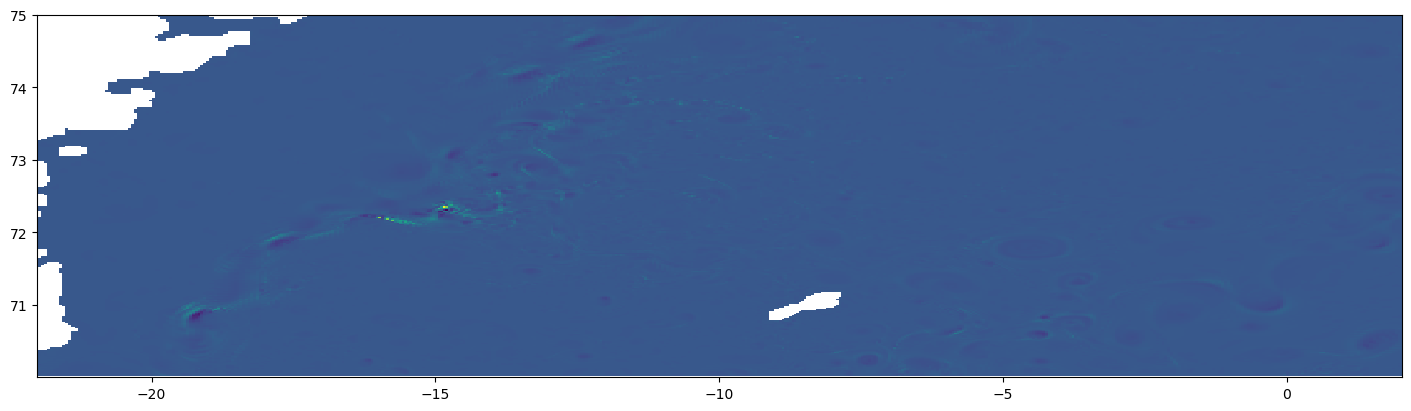

In [4]:
fig , ax = plt.subplots(figsize=(14,4),layout='constrained')
ax.pcolormesh(OW.X,OW.Y,OW[0])

print(OW.min())

In [5]:
# Set True to run, or read previously file made
run = input('Would you like to run a new dataset? y/n: ')
if run == 'y':
    run = True
elif run == 'n':
    run = False
if run:
    eddyLocation = []
    print('###Applying filter###')
    for i in range(len(eta)):
        eddyLocation.append(eddyDetection(eta_center[i],OW_center[i]))
        print('Processing: ',100*(i+1)/len(eta_center), '%')
    with open("eddyCenterpoints_test2.txt",'w') as f:
        for time in range(len(eddyLocation)):
            if time != len(eddyLocation)-1:
                f.write(str(eddyLocation[time])+',')
            else:
                f.write(str(eddyLocation[time]))

else:
    print('###Loading previously saved eddy centerpoints###')
    with open("eddyCenterpoints_test2.txt",'r') as f:
        data = f.read()
        eddyLocation = ast.literal_eval(data)

###Applying filter###


Generating Frames: 100%|██████████| 131/131 [00:51<00:00,  2.52it/s]


Skiped windows %: 88.18671004880491
Processing:  3.225806451612903 %


Generating Frames: 100%|██████████| 131/131 [00:50<00:00,  2.58it/s]


Skiped windows %: 88.674759103992
Processing:  6.451612903225806 %


Generating Frames: 100%|██████████| 131/131 [00:53<00:00,  2.43it/s]


Skiped windows %: 87.17485742889322
Processing:  9.67741935483871 %


Generating Frames: 100%|██████████| 131/131 [00:56<00:00,  2.32it/s]


Skiped windows %: 85.7732806550226
Processing:  12.903225806451612 %


Generating Frames: 100%|██████████| 131/131 [00:56<00:00,  2.30it/s]


Skiped windows %: 85.57663085256628
Processing:  16.129032258064516 %


Generating Frames: 100%|██████████| 131/131 [00:57<00:00,  2.30it/s]


Skiped windows %: 85.44791461823122
Processing:  19.35483870967742 %


Generating Frames: 100%|██████████| 131/131 [00:57<00:00,  2.29it/s]


Skiped windows %: 85.46936732395373
Processing:  22.580645161290324 %


Generating Frames: 100%|██████████| 131/131 [00:56<00:00,  2.31it/s]


Skiped windows %: 86.79585962779555
Processing:  25.806451612903224 %


Generating Frames: 100%|██████████| 131/131 [00:54<00:00,  2.39it/s]


Skiped windows %: 87.28748413393639
Processing:  29.032258064516128 %


Generating Frames: 100%|██████████| 131/131 [00:52<00:00,  2.50it/s]


Skiped windows %: 88.54604286965694
Processing:  32.25806451612903 %


Generating Frames: 100%|██████████| 131/131 [00:52<00:00,  2.50it/s]


Skiped windows %: 88.5782219282407
Processing:  35.483870967741936 %


Generating Frames: 100%|██████████| 131/131 [00:53<00:00,  2.47it/s]


Skiped windows %: 88.14201691188302
Processing:  38.70967741935484 %


Generating Frames: 100%|██████████| 131/131 [00:53<00:00,  2.44it/s]


Skiped windows %: 87.63966605288091
Processing:  41.935483870967744 %


Generating Frames: 100%|██████████| 131/131 [00:54<00:00,  2.40it/s]


Skiped windows %: 87.14446609578633
Processing:  45.16129032258065 %


Generating Frames: 100%|██████████| 131/131 [00:55<00:00,  2.35it/s]


Skiped windows %: 86.5938466489086
Processing:  48.38709677419355 %


Generating Frames: 100%|██████████| 131/131 [00:56<00:00,  2.31it/s]


Skiped windows %: 85.96099183009457
Processing:  51.61290322580645 %


Generating Frames: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]


Skiped windows %: 85.34780199152618
Processing:  54.83870967741935 %


Generating Frames: 100%|██████████| 131/131 [00:53<00:00,  2.43it/s]


Skiped windows %: 87.59139746500527
Processing:  58.064516129032256 %


Generating Frames: 100%|██████████| 131/131 [00:53<00:00,  2.45it/s]


Skiped windows %: 87.7147505229097
Processing:  61.29032258064516 %


Generating Frames: 100%|██████████| 131/131 [00:49<00:00,  2.64it/s]


Skiped windows %: 89.63476768507428
Processing:  64.51612903225806 %


Generating Frames: 100%|██████████| 131/131 [00:49<00:00,  2.65it/s]


Skiped windows %: 89.86538427159125
Processing:  67.74193548387096 %


Generating Frames: 100%|██████████| 131/131 [00:49<00:00,  2.62it/s]


Skiped windows %: 89.68839944938055
Processing:  70.96774193548387 %


Generating Frames: 100%|██████████| 131/131 [00:52<00:00,  2.52it/s]


Skiped windows %: 88.57107102633319
Processing:  74.19354838709677 %


Generating Frames: 100%|██████████| 131/131 [00:55<00:00,  2.37it/s]


Skiped windows %: 86.84234049019433
Processing:  77.41935483870968 %


Generating Frames: 100%|██████████| 131/131 [00:56<00:00,  2.33it/s]


Skiped windows %: 86.21306112233405
Processing:  80.64516129032258 %


Generating Frames: 100%|██████████| 131/131 [00:54<00:00,  2.40it/s]


Skiped windows %: 87.20703648747698
Processing:  83.87096774193549 %


Generating Frames: 100%|██████████| 131/131 [00:56<00:00,  2.33it/s]


Skiped windows %: 86.2094856713803
Processing:  87.09677419354838 %


Generating Frames: 100%|██████████| 131/131 [00:57<00:00,  2.29it/s]


Skiped windows %: 85.63920124425694
Processing:  90.3225806451613 %


Generating Frames: 100%|██████████| 131/131 [00:56<00:00,  2.30it/s]


Skiped windows %: 85.90199688935766
Processing:  93.54838709677419 %


Generating Frames: 100%|██████████| 131/131 [00:53<00:00,  2.44it/s]


Skiped windows %: 86.90848633283873
Processing:  96.7741935483871 %


Generating Frames: 100%|██████████| 131/131 [00:53<00:00,  2.45it/s]

Skiped windows %: 87.36256860396517
Processing:  100.0 %


In [6]:
OW

<xarray.DataArray 'Okubo_Weiss' (time: 31, Y: 231, X: 510)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 1.10551784e+00,  9.31475352e-01,  3.07817506e-02, ...,
          1.45466513e-01,  1.95109506e-01,  8.99655915e-02],
        [-1.86027550e-01,  6.78815032e-01,  6.99031605e-02, ...,
          2.04721275e-01,  1.65334675e-01,  7.57539281e-02],
        ...,
        [            nan,             nan,             nan, ...,
         -1.20062086e-02,  1.36449978e-02,  1.81685063e-02],
        [            nan,             nan,             nan, ...,
         -1.14532871e-04,  5.99252845e-03,  3.08898786e-02],
        [            nan,             nan,             nan, ...,
          3.82889751e-02,  6.31200198e-02,  5.17110214e-02]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 9.76701596e-01,  5.05255806e-01,  2.76609644e-01, ...,
          1.31804512e-01,  3.64348225e-01,  4.52378167e-01],
        [ 3.53711932e-01,  2.35796811e-01,  2.83982026e-01, ...,
          1.36107722e-01,  1.49863076e-01,  2.87893745e-01],
...
        [            nan,             nan,             nan, ...,
          7.26990723e-01,  3.08925473e-01, -1.85280949e-02],
        [            nan,             nan,             nan, ...,
          3.58390317e-01,  5.57014137e-01,  3.24364826e-01],
        [            nan,             nan,             nan, ...,
          7.07338397e-01,  6.04124457e-01,  4.97108150e-01]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [-1.40568751e-01, -1.59611288e-01, -3.97968268e-01, ...,
          5.51411009e-01,  5.23814792e-01,  4.11858808e-01],
        [-1.58780821e-01, -4.77695215e-01, -7.79464266e-01, ...,
          2.10736019e-01,  2.04812155e-01,  6.99168681e-01],
        ...,
        [            nan,             nan,             nan, ...,
         -1.93032709e-01, -8.59177464e-01, -1.15432229e+00],
        [            nan,             nan,             nan, ...,
          2.20286194e-02, -6.75592814e-01, -1.24127665e+00],
        [            nan,             nan,             nan, ...,
          5.27854308e-01,  1.84485342e-01, -1.68635097e-01]]])
Coordinates:
    Z        float64 -1.0
  * X        (X) float64 -21.98 -21.93 -21.87 -21.82 ... 1.822 1.879 1.936 1.994
  * Y        (Y) float64 70.01 70.03 70.04 70.06 ... 74.89 74.92 74.95 74.99
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-31

In [7]:
run = input('Would you like to run a new dataset? y/n: ')
if run == 'y':
    run = True
elif run == 'n':
    run = False

if run:
    eddy_centers = eddyLocation
    T = len(eddyLocation)
    pbar = tqdm(total=T, desc="Running algorythm")
    eddies = xr.full_like(eta,fill_value=0)
    eddies = eddies.rename("EddyDetection")
    for time in range(T):
        # First run per time step
        
        
        eddyDataset = newEddyMethod(OW=OW[time],hor_vel=hor_vel[time],eddy_center=eddy_centers[time][0][0],warm=True,eddiesDataset=eddies[time])
        
        for i in range(1,len(eddy_centers[time][0])):
            eddyDataset = newEddyMethod(OW=OW[time],hor_vel=hor_vel[time],eddy_center=eddy_centers[time][0][i],warm=True,eddiesDataset=eddyDataset)
            
        for i in range(0,len(eddy_centers[time][1])):
            eddyDataset = newEddyMethod(OW=OW[time],hor_vel=hor_vel[time],eddy_center=eddy_centers[time][1][i],cold=True,eddiesDataset=eddyDataset)
        
        pbar.update(1)
        eddies[time] = eddyDataset
    eddies.to_netcdf('D:/MScData/EddiesTest2.nc')
else:
    eddies = xr.open_dataset('D:/MScData/EddiesTest2.nc')
    eddies = eddies['EddyDetection']

Running algorythm: 100%|██████████| 31/31 [02:47<00:00,  5.79s/it]

<xarray.DataArray 'EddyDetection' (time: 31, Y: 231, X: 510)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * X        (X) float64 -21.98 -21.93 -21.87 -21.82 ... 1.822 1.879 1.936 1.994
  * Y        (Y) float64 70.01 70.03 70.04 70.06 ... 74.89 74.92 74.95 74.99
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-31
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter

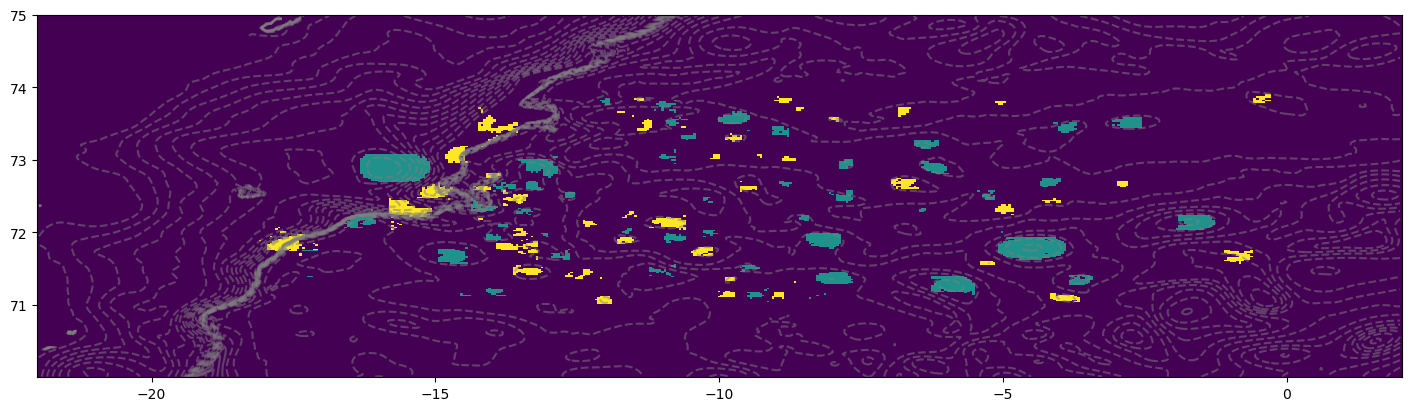

In [8]:
display(eddies)

fig , ax = plt.subplots(figsize=(14,4),layout='constrained')
ax.pcolormesh(eddies.X,eddies.Y,eddies[0])
ax.contour(eta.X,eta.Y,eta[0],np.linspace(-0.4,0.1,21),colors='grey',alpha=0.5)

In [12]:
from detection import outer_eddy_region

eddies_full = eddies.copy()
run = input('Would you like to run outer eddy region (y/n): ')
if run == "y":
    for time in range(len(eddies_full.time)):
        data = outer_eddy_region(hor_vel=hor_vel[time],eddiesDataset=eddies_full[time])
        print('Progress: ',100*(time+1)/len(eddies.time))
        data = data.where(data != 0, np.nan)
        eddies_full[time] = data
    eddies_full.to_netcdf('D:/MScData/eddies_fullTest2.nc')
elif run == "n":
    eddies_full = xr.open_dataset('D:/MScData/eddies_fullTest2.nc')['EddyDetection']

Running outer region algorythm: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]


Progress:  3.225806451612903


Running outer region algorythm: 100%|██████████| 231/231 [01:12<00:00,  3.17it/s]


Progress:  6.451612903225806


Running outer region algorythm: 100%|██████████| 231/231 [01:11<00:00,  3.22it/s]


Progress:  9.67741935483871


Running outer region algorythm: 100%|██████████| 231/231 [01:13<00:00,  3.12it/s]


Progress:  12.903225806451612


Running outer region algorythm: 100%|██████████| 231/231 [01:17<00:00,  2.99it/s]


Progress:  16.129032258064516


Running outer region algorythm: 100%|██████████| 231/231 [01:17<00:00,  2.98it/s]


Progress:  19.35483870967742


Running outer region algorythm: 100%|██████████| 231/231 [01:21<00:00,  2.84it/s]


Progress:  22.580645161290324


Running outer region algorythm: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]


Progress:  25.806451612903224


Running outer region algorythm: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]


Progress:  29.032258064516128


Running outer region algorythm: 100%|██████████| 231/231 [01:13<00:00,  3.14it/s]


Progress:  32.25806451612903


Running outer region algorythm: 100%|██████████| 231/231 [01:13<00:00,  3.16it/s]


Progress:  35.483870967741936


Running outer region algorythm: 100%|██████████| 231/231 [01:17<00:00,  2.99it/s]


Progress:  38.70967741935484


Running outer region algorythm: 100%|██████████| 231/231 [01:20<00:00,  2.87it/s]


Progress:  41.935483870967744


Running outer region algorythm: 100%|██████████| 231/231 [01:20<00:00,  2.88it/s]


Progress:  45.16129032258065


Running outer region algorythm: 100%|██████████| 231/231 [01:18<00:00,  2.94it/s]


Progress:  48.38709677419355


Running outer region algorythm: 100%|██████████| 231/231 [01:19<00:00,  2.90it/s]


Progress:  51.61290322580645


Running outer region algorythm: 100%|██████████| 231/231 [01:19<00:00,  2.89it/s]


Progress:  54.83870967741935


Running outer region algorythm: 100%|██████████| 231/231 [01:19<00:00,  2.91it/s]


Progress:  58.064516129032256


Running outer region algorythm: 100%|██████████| 231/231 [01:13<00:00,  3.12it/s]


Progress:  61.29032258064516


Running outer region algorythm: 100%|██████████| 231/231 [01:10<00:00,  3.28it/s]


Progress:  64.51612903225806


Running outer region algorythm: 100%|██████████| 231/231 [01:07<00:00,  3.43it/s]


Progress:  67.74193548387096


Running outer region algorythm: 100%|██████████| 231/231 [01:10<00:00,  3.26it/s]


Progress:  70.96774193548387


Running outer region algorythm: 100%|██████████| 231/231 [01:08<00:00,  3.36it/s]


Progress:  74.19354838709677


Running outer region algorythm: 100%|██████████| 231/231 [01:10<00:00,  3.29it/s]


Progress:  77.41935483870968


Running outer region algorythm: 100%|██████████| 231/231 [01:09<00:00,  3.33it/s]


Progress:  80.64516129032258


Running outer region algorythm: 100%|██████████| 231/231 [01:07<00:00,  3.41it/s]


Progress:  83.87096774193549


Running outer region algorythm: 100%|██████████| 231/231 [01:08<00:00,  3.40it/s]


Progress:  87.09677419354838


Running outer region algorythm: 100%|██████████| 231/231 [01:08<00:00,  3.38it/s]


Progress:  90.3225806451613


Running outer region algorythm: 100%|██████████| 231/231 [01:08<00:00,  3.39it/s]


Progress:  93.54838709677419


Running outer region algorythm: 100%|██████████| 231/231 [01:08<00:00,  3.39it/s]


Progress:  96.7741935483871


Running outer region algorythm: 100%|██████████| 231/231 [01:09<00:00,  3.30it/s]

Progress:  100.0


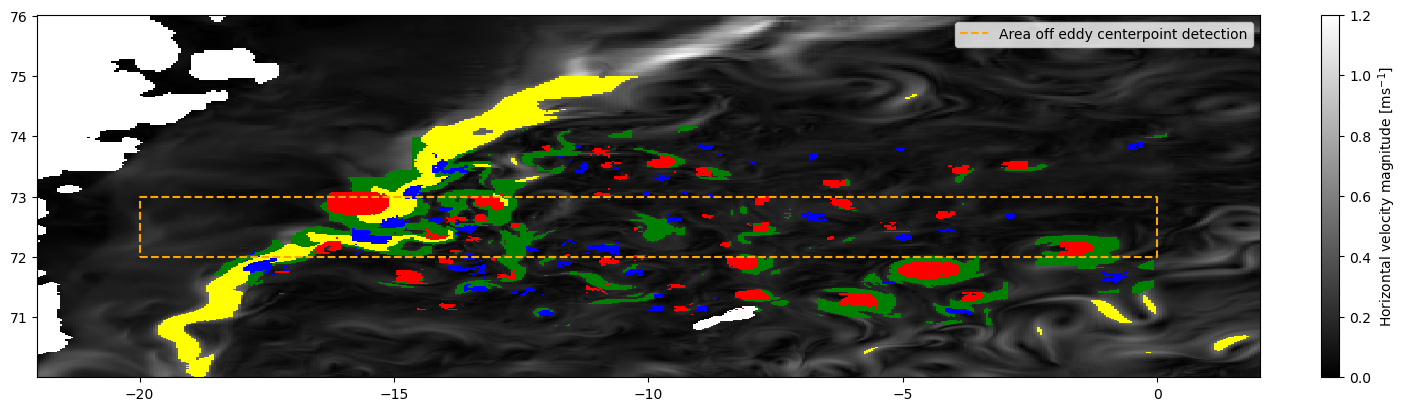

In [13]:
# 1 = warm, 2 = cold, 3 = current, 4 = stream
import matplotlib.colors as mcolors

# Define the custom colormap
colors = ['red', 'blue', 'yellow', 'green']
cmap = mcolors.ListedColormap(colors)

# Define the normalization
bounds = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(14,4),layout='constrained')
mesh = ax.pcolormesh(hor_vel.X,hor_vel.Y,hor_vel[0],vmin=0,vmax=1.2,cmap='binary_r')
cbar = fig.colorbar(mesh)
cbar.set_label('Horizontal velocity magnitude [ms$^{-1}$]')
ax.pcolormesh(eddies_full.X,eddies_full.Y,eddies_full[0],cmap=cmap, norm=norm)
x = [-20,0,0,-20,-20]
y = [72,72,73,73,72]
ax.plot(x,y,color='orange',linestyle='--', label='Area off eddy centerpoint detection')
ax.legend()

Generating Frames: 63it [00:31,  2.00it/s]


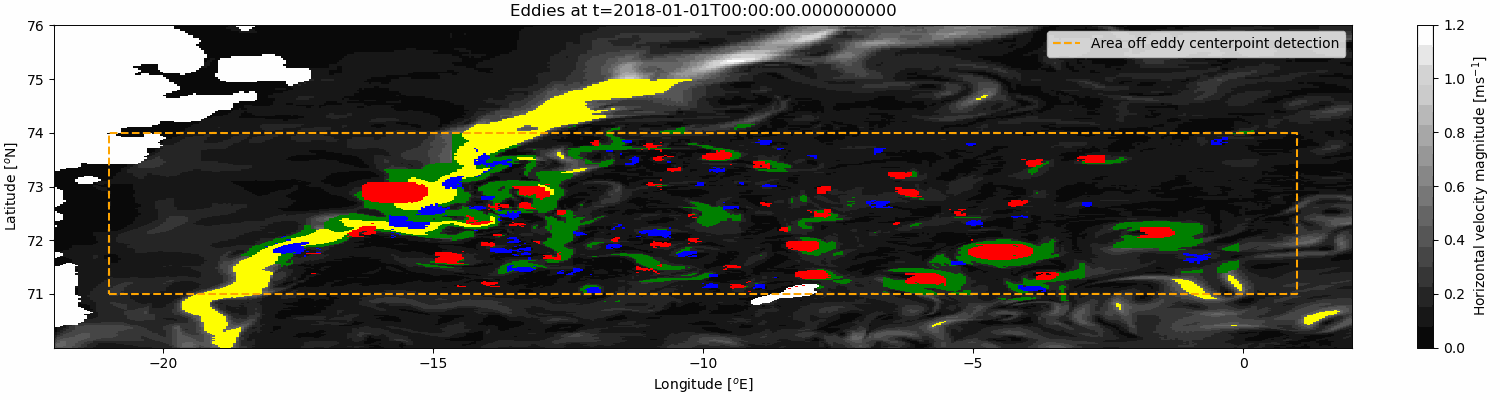

In [14]:
# Animation of Eddies
from animation import animate_eddies
animate_eddies(eddies_full=eddies_full,hor_vel=hor_vel,fname='TestNewEddiesMethod')